# Explore here

In [1]:
!pip install tableone
!pip install prophet

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl.metadata (9.5 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached statsmodels-0.14.4-cp312-cp312-win_amd64.whl (9.8 MB)
Using cached tabulate-0.9.0-py3-none-any.whl (35 kB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)
  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached holidays-0.70-py3-none-any.whl.metadata (34 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-

In [2]:
#import relevant packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from tableone import TableOne
from prophet import Prophet
from colorama import Fore
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

Importing plotly failed. Interactive plots will not work.


In [3]:
#cargar dataset
df_auser = pd.read_csv('../data/raw/Aquifer_Auser.csv')

#mostrar df de auser
df_auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [4]:
#explorar dataset de auser
df_auser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8154 entries, 0 to 8153
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     8154 non-null   object 
 1   Rainfall_Gallicano                       5295 non-null   float64
 2   Rainfall_Pontetetto                      5295 non-null   float64
 3   Rainfall_Monte_Serra                     5289 non-null   float64
 4   Rainfall_Orentano                        5295 non-null   float64
 5   Rainfall_Borgo_a_Mozzano                 5295 non-null   float64
 6   Rainfall_Piaggione                       4930 non-null   float64
 7   Rainfall_Calavorno                       5295 non-null   float64
 8   Rainfall_Croce_Arcana                    5295 non-null   float64
 9   Rainfall_Tereglio_Coreglia_Antelminelli  5295 non-null   float64
 10  Rainfall_Fabbriche_di_Vallico            5295 no

In [5]:
#convertir la columna de fecha a datetime
df_auser['Date'] = pd.to_datetime(df_auser['Date'], format='%d/%m/%Y')
df_auser

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,1998-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1998-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1998-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1998-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [6]:
df_auser.columns

Index(['Date', 'Rainfall_Gallicano', 'Rainfall_Pontetetto',
       'Rainfall_Monte_Serra', 'Rainfall_Orentano', 'Rainfall_Borgo_a_Mozzano',
       'Rainfall_Piaggione', 'Rainfall_Calavorno', 'Rainfall_Croce_Arcana',
       'Rainfall_Tereglio_Coreglia_Antelminelli',
       'Rainfall_Fabbriche_di_Vallico', 'Depth_to_Groundwater_LT2',
       'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_PAG',
       'Depth_to_Groundwater_CoS', 'Depth_to_Groundwater_DIEC',
       'Temperature_Orentano', 'Temperature_Monte_Serra',
       'Temperature_Ponte_a_Moriano', 'Temperature_Lucca_Orto_Botanico',
       'Volume_POL', 'Volume_CC1', 'Volume_CC2', 'Volume_CSA', 'Volume_CSAL',
       'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione'],
      dtype='object')

<Axes: >

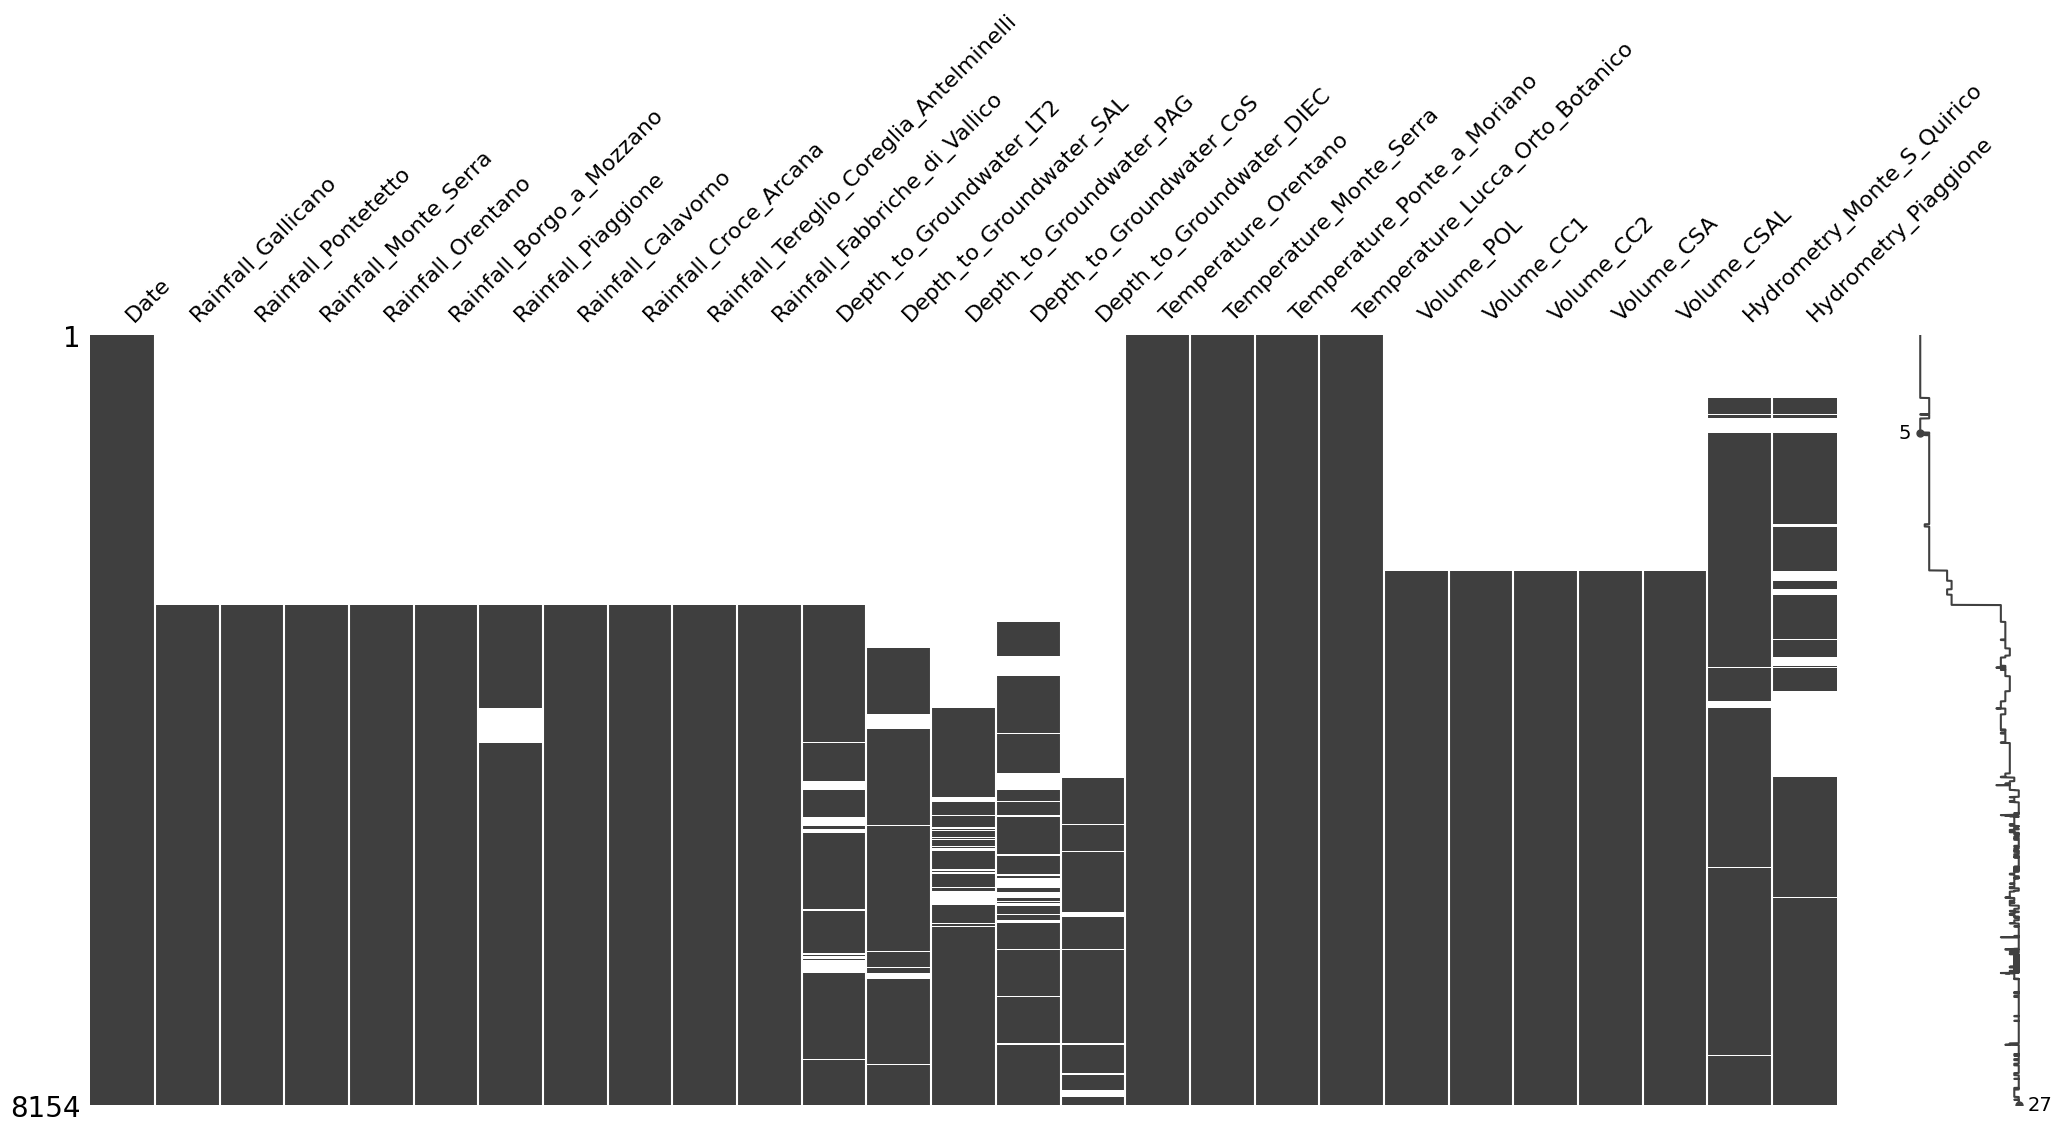

In [7]:
#visualizar nans
msno.matrix(df_auser)

In [8]:
#borrar filas antiguas
df_auser = df_auser[df_auser['Rainfall_Pontetetto'].notna()].reset_index(drop=True)

#ver registros con lluvia piaggione de valores nulos
df_auser[df_auser['Rainfall_Piaggione'].isna()]

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
1096,2009-01-01,42.4,19.6,11.6,5.2,54.0,NaN,52.4,3.2,19.2,...,3.90,5.25,2.70,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.48,NaN
1097,2009-01-02,2.2,0.6,0.0,0.2,0.2,NaN,2.8,1.6,0.0,...,3.75,5.55,4.45,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.48,NaN
1098,2009-01-03,0.2,0.2,0.0,0.0,0.0,NaN,0.0,0.6,0.0,...,-1.45,3.20,4.40,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.44,NaN
1099,2009-01-04,0.0,0.0,0.0,0.2,0.0,NaN,0.2,0.0,0.0,...,0.55,1.45,1.30,-9671.612903,-15648.59613,-12005.0208,0.0,0.0,0.39,NaN
1100,2009-01-05,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,...,3.10,2.20,0.60,-10180.645160,-16472.20645,-12636.8640,0.0,0.0,0.35,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2009-12-27,0.2,0.0,0.0,0.0,0.0,NaN,0.0,2.4,0.0,...,4.40,7.35,6.00,-10955.645160,-15841.44000,-12087.1008,0.0,0.0,0.92,NaN
1457,2009-12-28,0.0,0.0,21.8,18.2,0.0,NaN,0.2,0.0,9.6,...,4.70,5.35,6.15,-11532.258060,-16675.20000,-12723.2640,0.0,0.0,0.77,NaN
1458,2009-12-29,17.4,20.0,6.4,3.8,18.0,NaN,14.2,0.0,4.0,...,7.15,8.25,5.50,-11532.258060,-16675.20000,-12723.2640,0.0,0.0,0.73,NaN
1459,2009-12-30,16.4,15.4,9.6,6.8,22.6,NaN,16.6,2.0,18.6,...,9.50,11.70,8.75,-11532.258060,-16675.20000,-12723.2640,0.0,0.0,0.75,NaN


In [9]:
#verificar si hay valores nulos
target_variables = ['Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS']

df_auser[target_variables].describe()

,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_CoS
count,4802.000000,4545.000000,4315.000000
mean,-13.372041,-5.651274,-6.316783
std,1.037100,0.642939,1.379046
min,-15.310000,-7.000000,-9.570000
25%,-14.380000,-6.040000,-7.470000
50%,-13.040000,-5.680000,-6.250000
75%,-12.530000,-5.300000,-5.090000
max,0.000000,0.000000,0.000000


In [10]:
#reemplazar valores 0 por nulos
df_auser_copy = df_auser[target_variables].replace(np.nan, 0)

#reemplazar valores 0 por nulos en df original
df_auser[target_variables] = df_auser[target_variables].replace(0, np.nan)

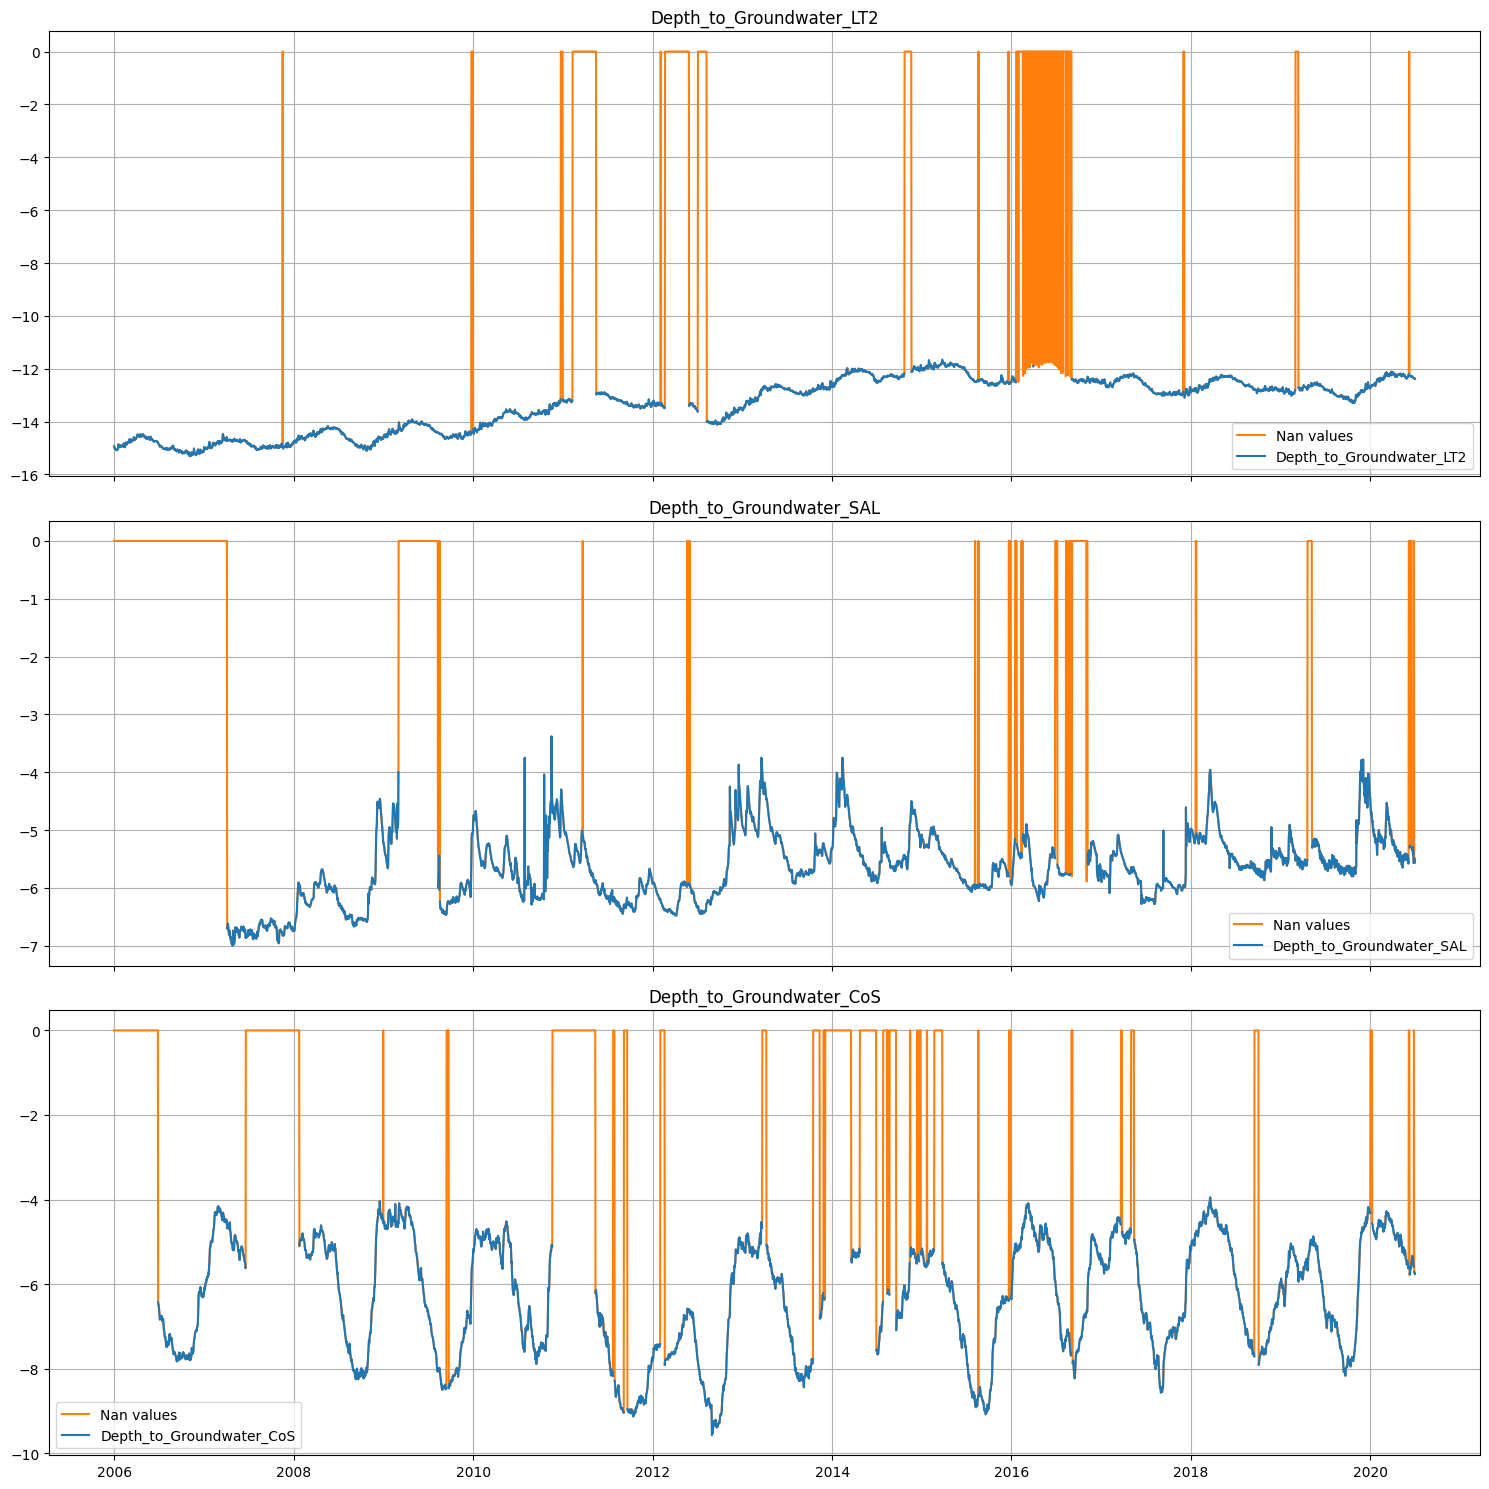

In [11]:
#crear grilla para graficos
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

#crear bucle para graficar cada variable con sus valores nulos evidenciados en df copia
for i, var in enumerate(target_variables):
    #graficar df con valores nulos y evidenciarlos con valores 0 en df copia
    axes[i].plot(df_auser['Date'], df_auser_copy[var], label= 'Nan values', color='C1')
    axes[i].plot(df_auser['Date'], df_auser[var], label=var, color='C0')
    axes[i].set_title(var)
    axes[i].grid(True)
    axes[i].legend()

plt.tight_layout()
plt.show()

- Las variables objetivo carecen de datos continuos. A pesar de no ser ideal y de poder introducir sesgos, dada la estacionalidad esperada en la fluctacion de los niveles de agua, procederemos a imputar los datos faltantes mediante interpolacion.

In [12]:
# convertir date a datetime y usarlo como índice
df_auser['Date'] = pd.to_datetime(df_auser['Date'])
df_auser.set_index('Date', inplace=True)

# Resetear copia del dataframe original
df_auser_copy = df_auser.copy()

#definir funcion para obtener nans internos
def get_internal_nan_indices(series):
    full_index = series.index
    first_valid = series.first_valid_index()
    last_valid = series.last_valid_index()

    # Crear máscara booleana del mismo largo que la serie original
    internal_nan_mask = pd.Series(False, index=full_index)

    # Limitar solo entre primer y último valor no nulo
    internal_range = series.loc[first_valid:last_valid]
    internal_nan_mask.loc[first_valid:last_valid] = internal_range.isnull()

    return internal_nan_mask

# interpolación solo para fines de STL (rellenar extremos)
def prepare_for_stl(series):
    return series.interpolate(method='linear').ffill().bfill()

# STL y desestacionalización
def stl_impute(series, mask_internal_nans, period=365):
    stl = STL(series.fillna(np.nanmean(series)),  # Simple mean fill just for STL init
          period=period, 
          seasonal=365, 
          trend=547,  # Larger trend window
          robust=True,
          seasonal_deg=1)  # Linear seasonality
    
    res = stl.fit()
    
    reconstructed = res.trend + res.seasonal

    result = series.copy()
    result[mask_internal_nans] = reconstructed[mask_internal_nans]
    
    return result

In [13]:
#obtener nans de cada columna objetivo
imputed_indices_LT2 = get_internal_nan_indices(df_auser['Depth_to_Groundwater_LT2'])
imputed_indices_SAL = get_internal_nan_indices(df_auser['Depth_to_Groundwater_SAL'])
imputed_indices_CoS = get_internal_nan_indices(df_auser['Depth_to_Groundwater_CoS'])

# Aplicar a cada columna objetivo
df_auser_copy['Depth_to_Groundwater_LT2'] = stl_impute(df_auser['Depth_to_Groundwater_LT2'], imputed_indices_LT2)
df_auser_copy['Depth_to_Groundwater_SAL'] = stl_impute(df_auser['Depth_to_Groundwater_SAL'], imputed_indices_SAL)
df_auser_copy['Depth_to_Groundwater_CoS'] = stl_impute(df_auser['Depth_to_Groundwater_CoS'], imputed_indices_CoS)

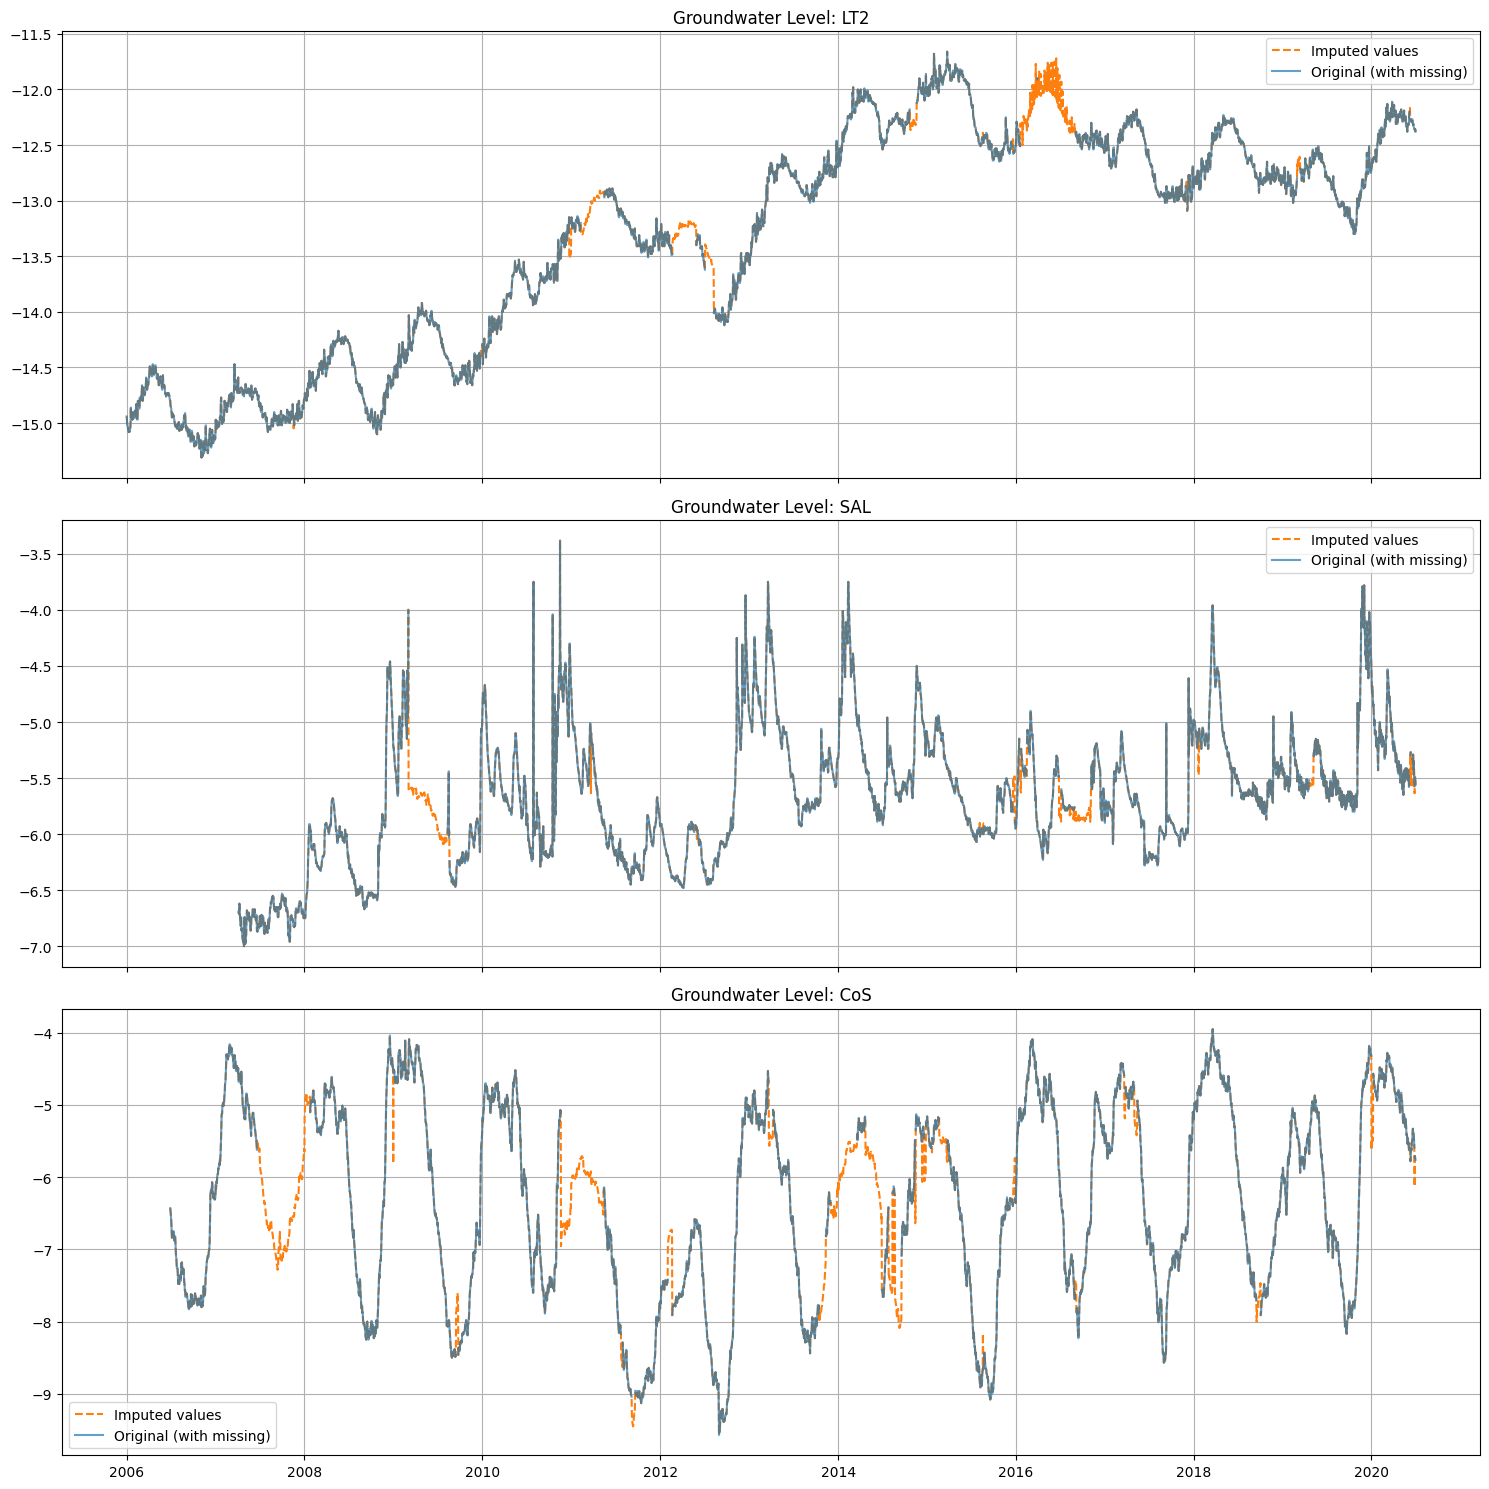

In [14]:
# Crear figura con 3 subgráficos
fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

# Graficar cada variable
for i, var in enumerate(target_variables):    
    # Serie imputada
    axes[i].plot(df_auser_copy.index, df_auser_copy[var], 
                 label='Imputed values', 
                 color='C1', 
                 linestyle='--')
    
    # Serie original (con huecos)
    axes[i].plot(df_auser.index, df_auser[var], 
                 label='Original (with missing)', 
                 color='C0', 
                 alpha=0.7)
        
    axes[i].set_title(f'Groundwater Level: {var.split("_")[-1]}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

In [15]:
#realizamos el mismo proceso de imputacion para las variables predictoras
##obtener nans de cada columna predictora
imputed_indices_rf_piaggione = get_internal_nan_indices(df_auser['Rainfall_Piaggione'])
imputed_indices_hd_monte_s_quirico = get_internal_nan_indices(df_auser['Hydrometry_Monte_S_Quirico'])
imputed_indices__hd_piaggione = get_internal_nan_indices(df_auser['Hydrometry_Piaggione'])
imputed_indices_diec = get_internal_nan_indices(df_auser['Depth_to_Groundwater_DIEC'])
imputed_indices_pag = get_internal_nan_indices(df_auser['Depth_to_Groundwater_PAG'])


# Aplicar a cada columna predictora
df_auser_copy['Rainfall_Piaggione'] = stl_impute(df_auser['Rainfall_Piaggione'], imputed_indices_rf_piaggione)
df_auser_copy['Hydrometry_Monte_S_Quirico'] = stl_impute(df_auser['Hydrometry_Monte_S_Quirico'], imputed_indices_hd_monte_s_quirico)
df_auser_copy['Hydrometry_Piaggione'] = stl_impute(df_auser['Hydrometry_Piaggione'], imputed_indices__hd_piaggione)
df_auser_copy['Depth_to_Groundwater_DIEC'] = stl_impute(df_auser['Depth_to_Groundwater_DIEC'], imputed_indices_diec)
df_auser_copy['Depth_to_Groundwater_PAG'] = stl_impute(df_auser['Depth_to_Groundwater_PAG'], imputed_indices_pag)

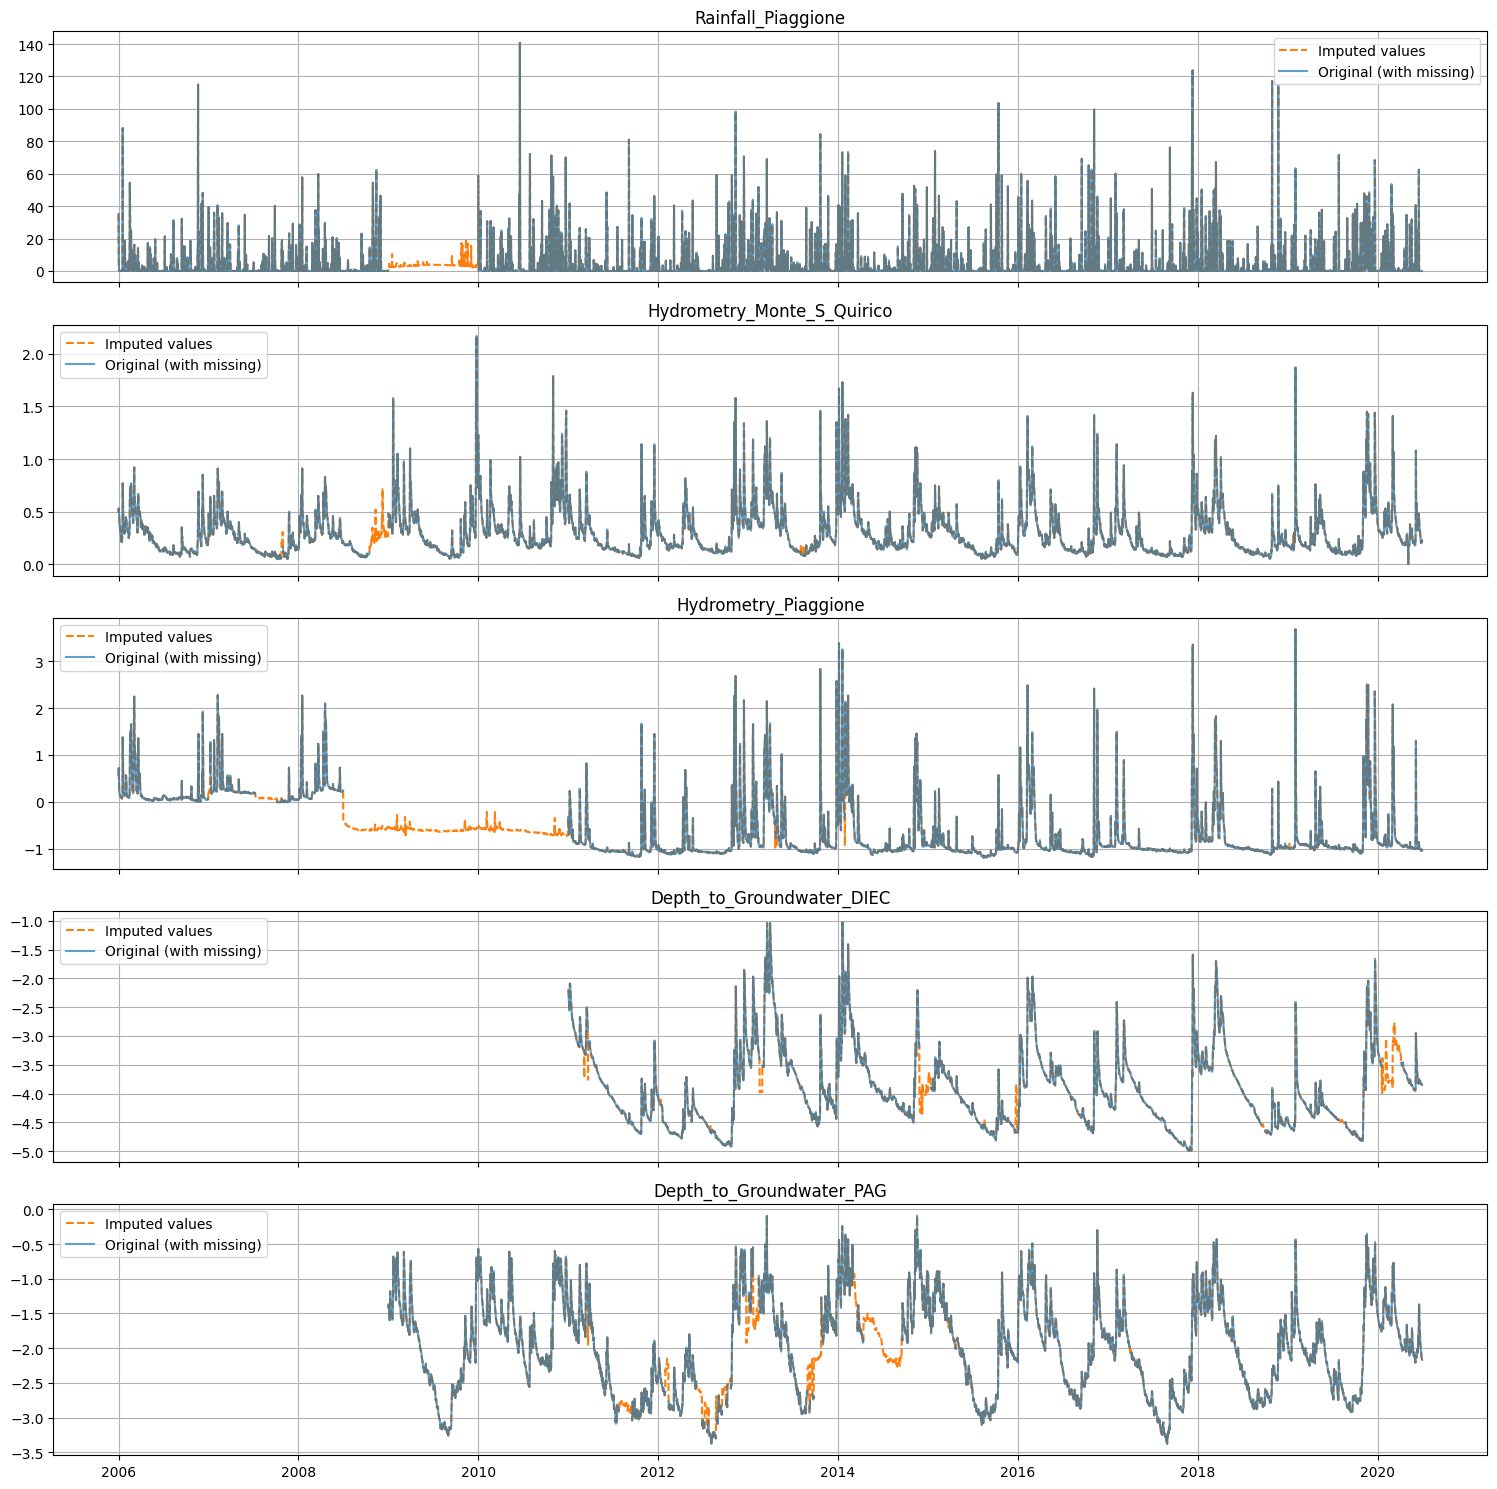

In [16]:
#graficar variables predictoras imputadas
fig, axes = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

# Graficar cada variable
for i, var in enumerate(['Rainfall_Piaggione', 'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione', 'Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG']):    
    # Serie imputada
    axes[i].plot(df_auser_copy.index, df_auser_copy[var], 
                 label='Imputed values', 
                 color='C1', 
                 linestyle='--')
    
    # Serie original (con huecos)
    axes[i].plot(df_auser.index, df_auser[var], 
                 label='Original (with missing)', 
                 color='C0', 
                 alpha=0.7)
        
    axes[i].set_title(f'{var}')
    axes[i].legend()
    axes[i].grid(True)
plt.tight_layout()
plt.show()

In [17]:
#reemplazar valores nulos por imputados en variables objetivo y variables predictoras
df_auser[target_variables] = df_auser_copy[target_variables]
df_auser[['Rainfall_Piaggione', 'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione', 'Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG']] = df_auser_copy[['Rainfall_Piaggione', 'Hydrometry_Monte_S_Quirico', 'Hydrometry_Piaggione', 'Depth_to_Groundwater_DIEC', 'Depth_to_Groundwater_PAG']]

#para reducir fuentes de sesgo, eliminamos los registros previos al 2011
df_auser = df_auser[df_auser.index >= '2011-01-02']

#verificamos que no haya nulos
df_auser.isna().sum()


Rainfall_Gallicano                         0
Rainfall_Pontetetto                        0
Rainfall_Monte_Serra                       6
Rainfall_Orentano                          0
Rainfall_Borgo_a_Mozzano                   0
Rainfall_Piaggione                         0
Rainfall_Calavorno                         0
Rainfall_Croce_Arcana                      0
Rainfall_Tereglio_Coreglia_Antelminelli    0
Rainfall_Fabbriche_di_Vallico              0
Depth_to_Groundwater_LT2                   0
Depth_to_Groundwater_SAL                   0
Depth_to_Groundwater_PAG                   0
Depth_to_Groundwater_CoS                   0
Depth_to_Groundwater_DIEC                  0
Temperature_Orentano                       0
Temperature_Monte_Serra                    0
Temperature_Ponte_a_Moriano                0
Temperature_Lucca_Orto_Botanico            0
Volume_POL                                 0
Volume_CC1                                 0
Volume_CC2                                 0
Volume_CSA

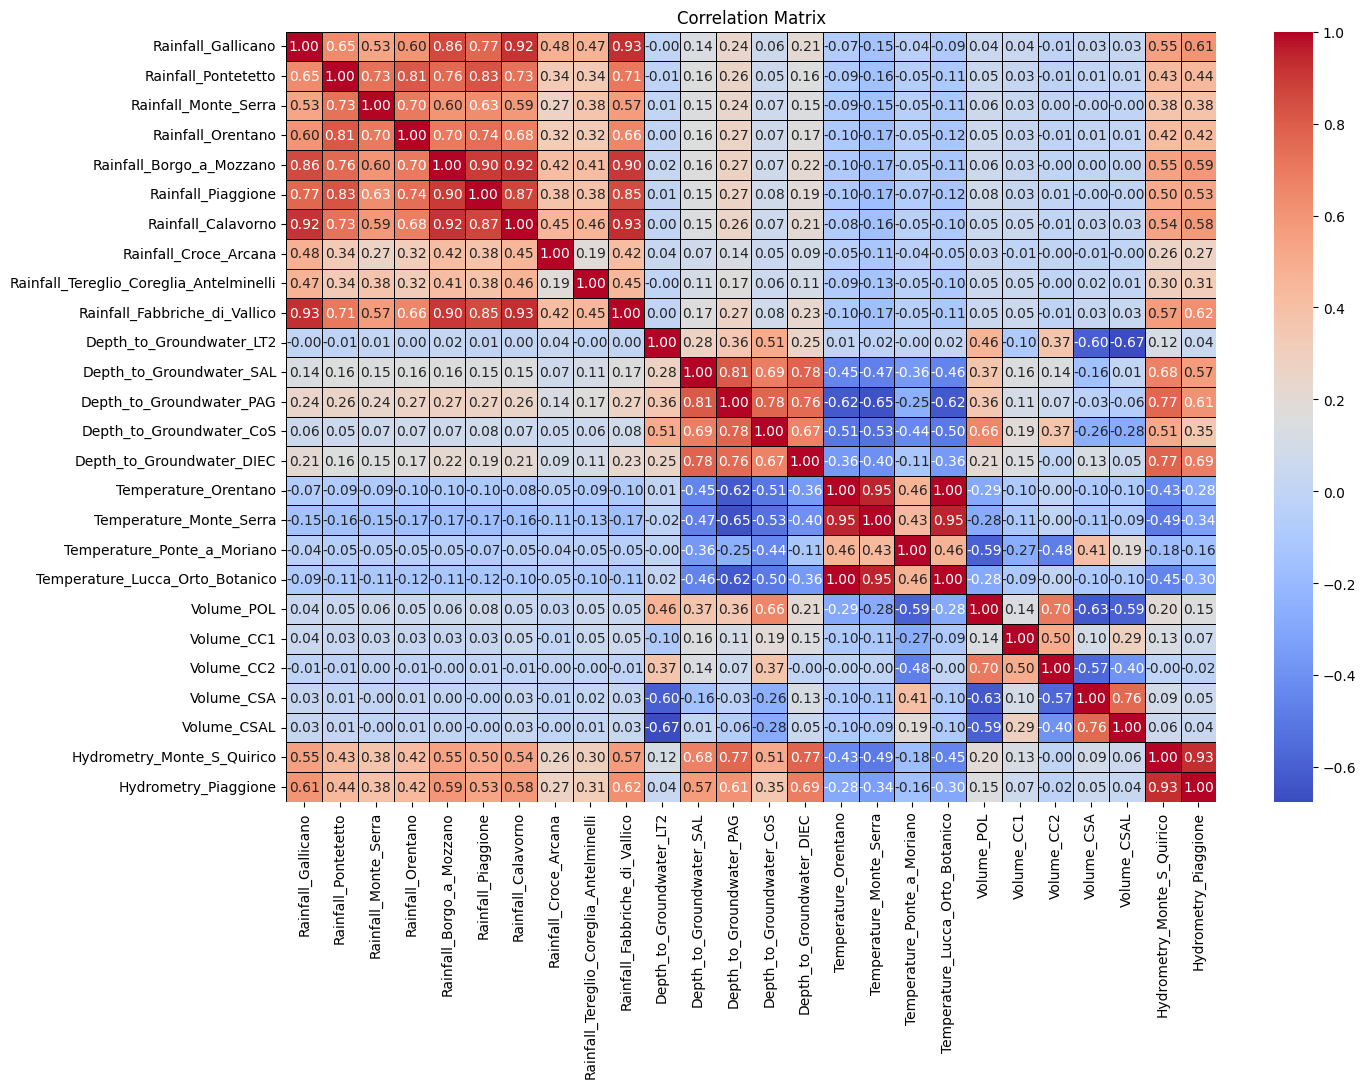

In [18]:
#matriz de correlaciones
plt.figure(figsize=(15, 10))
sns.heatmap(df_auser.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [19]:
#varianza de variables en el dataframe de mayor a menor
df_auser.var().sort_values(ascending=False)

Volume_CSA                                 7.585891e+06
Volume_CSAL                                6.414437e+06
Volume_POL                                 3.269146e+06
Volume_CC1                                 3.052926e+06
Volume_CC2                                 2.451331e+06
Rainfall_Fabbriche_di_Vallico              2.677322e+02
Rainfall_Gallicano                         2.215968e+02
Rainfall_Borgo_a_Mozzano                   1.843810e+02
Rainfall_Calavorno                         1.600410e+02
Rainfall_Tereglio_Coreglia_Antelminelli    1.233651e+02
Rainfall_Piaggione                         1.227994e+02
Rainfall_Monte_Serra                       1.163505e+02
Rainfall_Croce_Arcana                      1.030510e+02
Rainfall_Pontetetto                        1.030478e+02
Temperature_Ponte_a_Moriano                8.042981e+01
Rainfall_Orentano                          7.655499e+01
Temperature_Lucca_Orto_Botanico            4.916374e+01
Temperature_Orentano                       4.832

In [20]:
#seleccion de variables predictoras en base a correlaciones y varianzas
df_model = df_auser[['Volume_CSA', 'Volume_CC1', 'Rainfall_Fabbriche_di_Vallico', 'Temperature_Lucca_Orto_Botanico',
                     'Hydrometry_Piaggione', 'Depth_to_Groundwater_LT2', 'Depth_to_Groundwater_SAL', 'Depth_to_Groundwater_CoS',
                     ]].copy()

df_model

,Volume_CSA,Volume_CC1,Rainfall_Fabbriche_di_Vallico,Temperature_Lucca_Orto_Botanico,Hydrometry_Piaggione,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_CoS
Date,,,,,,,,
2011-01-02,0.00,-15660.85414,0.0,5.00,-0.48,-13.15,-4.760000,-6.083593
2011-01-03,0.00,-16485.10963,0.0,4.40,-0.51,-13.19,-4.830000,-6.056744
2011-01-04,0.00,-16485.10963,0.0,0.15,-0.64,-13.23,-4.890000,-6.031751
2011-01-05,0.00,-16485.10963,0.0,3.55,-0.70,-13.23,-4.950000,-5.991181
2011-01-06,0.00,-16485.10963,1.8,6.75,-0.67,-13.24,-4.990000,-5.979885
...,...,...,...,...,...,...,...,...
2020-06-26,-6115.40,-7847.90000,0.0,23.75,-1.03,-12.36,-5.635605,-6.129188
2020-06-27,-6115.40,-7847.90000,0.0,24.30,-1.03,-12.36,-5.500000,-5.710000
2020-06-28,-5809.63,-7455.50500,0.0,24.55,-1.03,-12.37,-5.490000,-5.730000


In [21]:
#pasar indice 'Date' a columna
df_model.reset_index(inplace=True)

#renombrar columna 'Date' a 'ds'
df_model.rename(columns={'Date': 'ds'}, inplace=True)

df_model

,ds,Volume_CSA,Volume_CC1,Rainfall_Fabbriche_di_Vallico,Temperature_Lucca_Orto_Botanico,Hydrometry_Piaggione,Depth_to_Groundwater_LT2,Depth_to_Groundwater_SAL,Depth_to_Groundwater_CoS
0,2011-01-02,0.00,-15660.85414,0.0,5.00,-0.48,-13.15,-4.760000,-6.083593
1,2011-01-03,0.00,-16485.10963,0.0,4.40,-0.51,-13.19,-4.830000,-6.056744
2,2011-01-04,0.00,-16485.10963,0.0,0.15,-0.64,-13.23,-4.890000,-6.031751
3,2011-01-05,0.00,-16485.10963,0.0,3.55,-0.70,-13.23,-4.950000,-5.991181
4,2011-01-06,0.00,-16485.10963,1.8,6.75,-0.67,-13.24,-4.990000,-5.979885
...,...,...,...,...,...,...,...,...,...
3463,2020-06-26,-6115.40,-7847.90000,0.0,23.75,-1.03,-12.36,-5.635605,-6.129188
3464,2020-06-27,-6115.40,-7847.90000,0.0,24.30,-1.03,-12.36,-5.500000,-5.710000
3465,2020-06-28,-5809.63,-7455.50500,0.0,24.55,-1.03,-12.37,-5.490000,-5.730000
3466,2020-06-29,-6115.40,-7847.90000,0.0,23.60,-1.02,-12.36,-5.500000,-5.730000


In [22]:
#definimos variables predictoras para las variables objetivo del sistema norte
feature_columns_SAL = [
    'Volume_CSA',
    'Volume_CC1',
    'Rainfall_Fabbriche_di_Vallico',
    'Temperature_Lucca_Orto_Botanico',
    'Hydrometry_Piaggione'
    ]

feature_columns_CoS = [
    'Volume_CSA',
    'Volume_CC1',
    'Rainfall_Fabbriche_di_Vallico',
    'Temperature_Lucca_Orto_Botanico',
    'Hydrometry_Piaggione'
    ]

#agregamos como variables predictoras de LT2 (sistema sur) a SAL y CoS, en consecuencia con la dependencia del sistema sur del sistema norte
feature_columns_LT2 = [
    'Volume_CSA',
    'Volume_CC1',
    'Rainfall_Fabbriche_di_Vallico',
    'Temperature_Lucca_Orto_Botanico',
    'Hydrometry_Piaggione',
    'Depth_to_Groundwater_SAL',
    'Depth_to_Groundwater_CoS'
    ]

#identificar columnas objetivo para cada sistema
target_column_SAL = df_model['Depth_to_Groundwater_SAL']
target_column_CoS = df_model['Depth_to_Groundwater_CoS']
target_column_LT2 = df_model['Depth_to_Groundwater_LT2']

#determinar tamano de entrenamiento y validacion
train_size = int(0.85 * len(df_model))

#crear dataframe que contenga las variables predictoras para cada variable objetivo
multivariate_df_SAL = pd.concat([df_model['ds'], target_column_SAL, df_model[feature_columns_SAL]], axis=1)
multivariate_df_CoS = pd.concat([df_model['ds'], target_column_CoS, df_model[feature_columns_CoS]], axis=1)
multivariate_df_LT2 = pd.concat([df_model['ds'], target_column_LT2, df_model[feature_columns_LT2]], axis=1)

#renombrar columna objetivo a 'y'
multivariate_df_SAL.columns = ['ds', 'y'] + feature_columns_SAL
multivariate_df_CoS.columns = ['ds', 'y'] + feature_columns_CoS
multivariate_df_LT2.columns = ['ds', 'y'] + feature_columns_LT2

#definir set de entrenamiento y validacion para cada variable objetivo
train_SAL = multivariate_df_SAL.iloc[:train_size, :]
train_CoS = multivariate_df_CoS.iloc[:train_size, :]
train_LT2 = multivariate_df_LT2.iloc[:train_size, :]

#ver train ejemplo
train_SAL.head()

,ds,y,Volume_CSA,Volume_CC1,Rainfall_Fabbriche_di_Vallico,Temperature_Lucca_Orto_Botanico,Hydrometry_Piaggione
0,2011-01-02,-4.76,0.0,-15660.85414,0.0,5.00,-0.48
1,2011-01-03,-4.83,0.0,-16485.10963,0.0,4.40,-0.51
2,2011-01-04,-4.89,0.0,-16485.10963,0.0,0.15,-0.64
3,2011-01-05,-4.95,0.0,-16485.10963,0.0,3.55,-0.70
4,2011-01-06,-4.99,0.0,-16485.10963,1.8,6.75,-0.67


In [23]:
# Crear y entrenar modelo prophet para el sistema norte (SAL)
model = Prophet()
for reg in feature_columns_SAL:
    model.add_regressor(reg)

# ajustar el modelo a los datos de entrenamiento
model.fit(multivariate_df_SAL.iloc[:train_size])

# predecir
x_valid = multivariate_df_SAL[['ds'] + feature_columns_SAL].iloc[train_size:]
y_valid = multivariate_df_SAL['y'].iloc[train_size:]
y_pred = model.predict(x_valid)

# calcular metricas
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + f'RMSE SAL: {score_rmse:.3f}')

00:19:02 - cmdstanpy - INFO - Chain [1] start processing
00:19:03 - cmdstanpy - INFO - Chain [1] done processing


RMSE SAL: 0.326


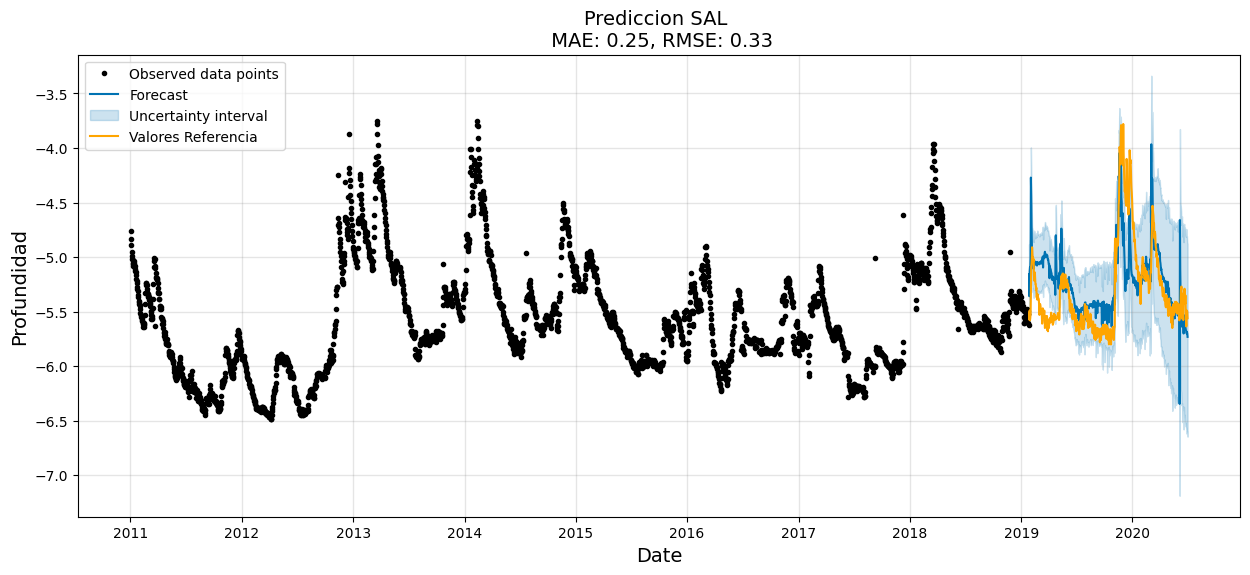

In [24]:
#graficar predicciones de SAL
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid, ax=ax, color='orange', label='Valores Referencia')

ax.set_title(f'Prediccion SAL \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Profundidad', fontsize=14)

plt.show()

In [25]:
# Crear y entrenar modelo prophet para el sistema norte (CoS)
model = Prophet()
for reg in feature_columns_CoS:
    model.add_regressor(reg)

# ajustar el modelo a los datos de entrenamiento
model.fit(multivariate_df_CoS.iloc[:train_size])

# predecir
x_valid = multivariate_df_CoS[['ds'] + feature_columns_CoS].iloc[train_size:]
y_valid = multivariate_df_CoS['y'].iloc[train_size:]
y_pred = model.predict(x_valid)

# calcular metricas
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + f'RMSE CoS: {score_rmse:.3f}')

00:19:04 - cmdstanpy - INFO - Chain [1] start processing
00:19:04 - cmdstanpy - INFO - Chain [1] done processing


RMSE CoS: 0.924


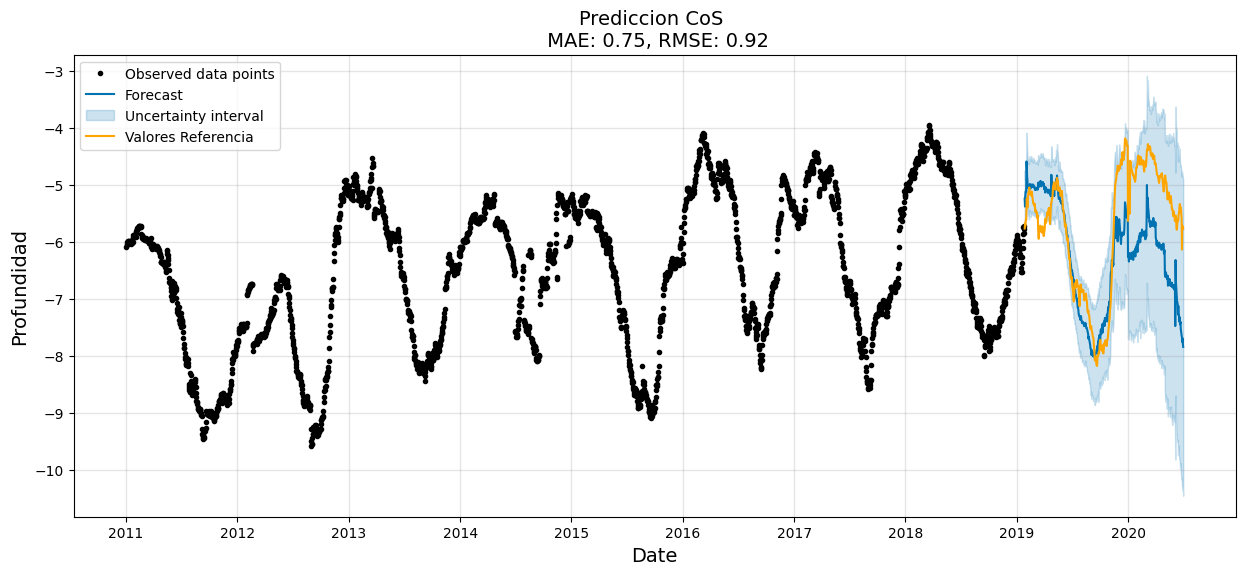

In [26]:
#graficar predicciones de CoS
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid, ax=ax, color='orange', label='Valores Referencia')

ax.set_title(f'Prediccion CoS \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Profundidad', fontsize=14)

plt.show()

In [27]:
# Crear y entrenar modelo prophet para el sistema norte (LT2)
model = Prophet()
for reg in feature_columns_LT2:
    model.add_regressor(reg)

# ajustar el modelo a los datos de entrenamiento
model.fit(multivariate_df_LT2.iloc[:train_size])

# predecir
x_valid = multivariate_df_LT2[['ds'] + feature_columns_LT2].iloc[train_size:]
y_valid = multivariate_df_LT2['y'].iloc[train_size:]
y_pred = model.predict(x_valid)

# calcular metricas
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + f'RMSE LT2: {score_rmse:.3f}')

00:19:05 - cmdstanpy - INFO - Chain [1] start processing
00:19:07 - cmdstanpy - INFO - Chain [1] done processing


RMSE LT2: 0.318


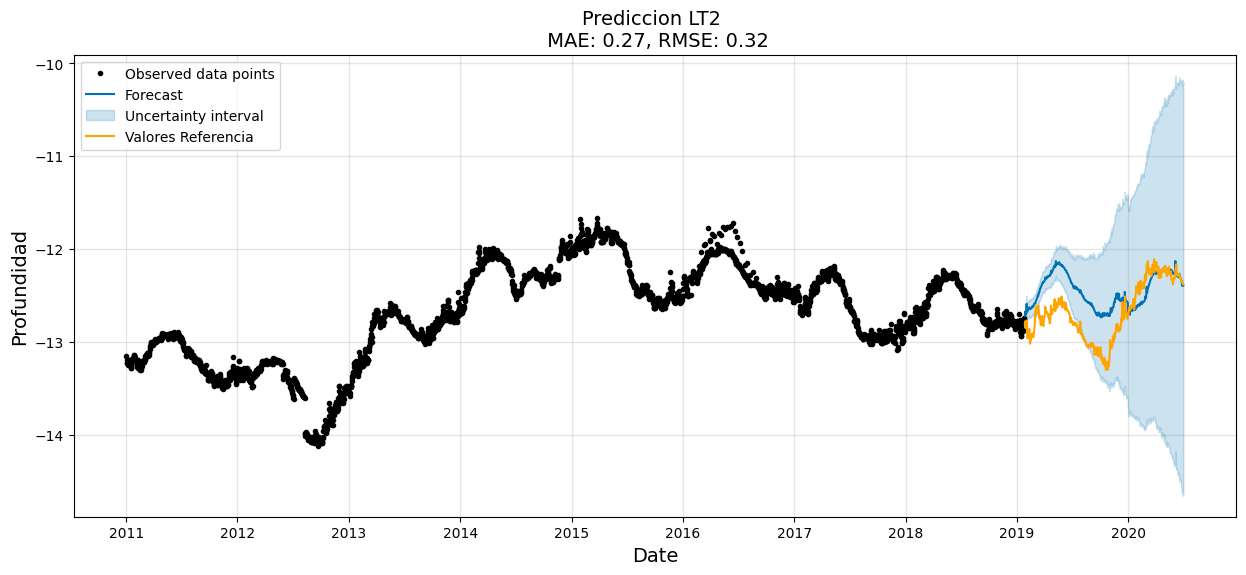

In [28]:
#graficar predicciones de LT2
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid, ax=ax, color='orange', label='Valores Referencia')

ax.set_title(f'Prediccion LT2 \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Profundidad', fontsize=14)

plt.show()
